<a href="https://colab.research.google.com/github/JDev000/AI-Visualization-Edica/blob/master/EDICA_AI_FRUIT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [3]:
import zipfile
import os

# Define the uploaded file name (change if different)
zip_file = "/content/data.zip"
project_path = "/content/project"

# Unzip the dataset
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(project_path)

print("✅ Dataset unzipped to:", project_path)


✅ Dataset unzipped to: /content/project


In [4]:
import os

# Define your project root
project_path = "/content/project"

# Create training folders
images_train = os.path.join(project_path, "train", "images")
labels_train = os.path.join(project_path, "train", "labels")

# Make sure training folders exist
os.makedirs(images_train, exist_ok=True)
os.makedirs(labels_train, exist_ok=True)

In [5]:
import shutil
from glob import glob

def move_files(src, dst, extensions):
    for ext in extensions:
        for file in glob(os.path.join(src, f"**/*{ext}"), recursive=True):
            if os.path.exists(file):
                shutil.move(file, os.path.join(dst, os.path.basename(file)))
            else:
                print(f"⚠️ Skipping missing file: {file}")

# Move all image and label files into the correct folders
move_files(project_path, images_train, [".jpg", ".jpeg", ".png"])  # Images
move_files(project_path, labels_train, [".txt"])                   # Labels

print("✅ Files moved into training structure.")

✅ Files moved into training structure.


In [6]:
yaml_content = """
path: /content/project
train: train/images
val: train/images  # Ultralytics will auto-split

names:
  0: apple
  1: mango
"""

with open(os.path.join(project_path, "data.yaml"), "w") as f:
    f.write(yaml_content.strip())

print("✅ data.yaml created.")


✅ data.yaml created.


In [7]:
from ultralytics import YOLO

# Load YOLOv8 nano model
model = YOLO("yolov8n.pt")

# Start training
model.train(data=os.path.join(project_path, "data.yaml"), epochs=50, imgsz=640, batch=16)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 194MB/s]


Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/project/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

100%|██████████| 755k/755k [00:00<00:00, 140MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 365MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 537.7±291.7 MB/s, size: 33.8 KB)


train: Scanning /content/project/train/labels... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<00:00, 53.48it/s]

train: New cache created: /content/project/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 296.8±90.8 MB/s, size: 33.8 KB)


val: Scanning /content/project/train/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.295G      2.015      2.914      2.421          8        640: 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all          2          2    0.00352          1      0.166       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50     0.301G      2.368       3.28      2.947          6        640: 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.72it/s]

                   all          2          2    0.00351          1      0.135     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.301G      2.253      3.026      3.124          6        640: 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]

                   all          2          2    0.00349          1       0.17      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.301G      2.361      3.356      2.695          6        640: 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.95it/s]

                   all          2          2    0.00347          1       0.18      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.301G      1.981      3.224      2.546          6        640: 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.06it/s]

                   all          2          2    0.00347          1      0.265      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.334G      2.359       3.27      2.776          5        640: 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.94it/s]

                   all          2          2    0.00346          1      0.332      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      0.35G      2.563       3.44      3.719          5        640: 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.00it/s]

                   all          2          2    0.00346          1      0.332      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      0.35G      1.785      3.009      2.297          6        640: 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.36it/s]

                   all          2          2    0.00338          1      0.415      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      0.35G      2.424      4.755      3.514          2        640: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.46it/s]

                   all          2          2    0.00337          1      0.497        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      0.35G      1.909      2.969      1.899          5        640: 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.97it/s]

                   all          2          2    0.00335          1      0.497       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.367G      1.693      3.053      2.201          6        640: 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          2          2    0.00334          1      0.497       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.367G      1.982      3.666       2.67          3        640: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.10it/s]

                   all          2          2    0.00334          1      0.746      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.367G     0.8857      3.121       1.62          3        640: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.79it/s]

                   all          2          2    0.00334          1      0.746      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.367G      1.314      3.024       1.92          6        640: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.76it/s]

                   all          2          2    0.00333          1      0.746      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.385G      1.135      2.693      1.615          7        640: 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.19it/s]

                   all          2          2    0.00333          1      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.385G     0.8546       2.62      1.536          6        640: 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.08it/s]

                   all          2          2    0.00333          1      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.385G      1.146      2.472      1.903          4        640: 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.81it/s]

                   all          2          2    0.00333          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.385G     0.9568      2.291      1.538          6        640: 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.18it/s]

                   all          2          2    0.00333          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      0.41G      1.188      2.344      1.789          6        640: 100%|██████████| 1/1 [00:00<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.27it/s]

                   all          2          2    0.00334          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      0.41G      1.309      2.575      1.872          5        640: 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.38it/s]

                   all          2          2    0.00334          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.412G      1.364       2.29      1.684          8        640: 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.24it/s]

                   all          2          2    0.00333          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.412G      1.407      2.401      2.072          3        640: 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.98it/s]

                   all          2          2    0.00333          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.428G       1.16      2.382      1.963          4        640: 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.82it/s]

                   all          2          2    0.00334          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.428G      1.176      2.185      1.807          7        640: 100%|██████████| 1/1 [00:00<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.92it/s]

                   all          2          2    0.00334          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.428G     0.9378      2.134      1.793          4        640: 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.01it/s]

                   all          2          2    0.00334          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.428G     0.9498      2.039       1.58          7        640: 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.54it/s]

                   all          2          2    0.00334          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.428G      1.103      2.262      1.525          8        640: 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.80it/s]

                   all          2          2    0.00334          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.428G     0.6733      1.996      1.295          6        640: 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.07it/s]

                   all          2          2    0.00334          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.428G      1.072      2.164      1.822          4        640: 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.64it/s]

                   all          2          2    0.00334          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.428G       1.08      2.385      1.911          4        640: 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.18it/s]

                   all          2          2    0.00334          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.428G     0.8729      1.974      1.405          8        640: 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.57it/s]

                   all          2          2    0.00335          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.428G     0.8633      1.843      1.495          7        640: 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.35it/s]

                   all          2          2    0.00335          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.428G      1.051      1.767      1.508          6        640: 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.60it/s]

                   all          2          2    0.00335          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.428G      1.078      2.158      1.837          4        640: 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.65it/s]

                   all          2          2    0.00335          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.428G      1.106      1.684      1.411          6        640: 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.21it/s]

                   all          2          2    0.00336          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.428G     0.5602      1.677      1.286          7        640: 100%|██████████| 1/1 [00:00<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.72it/s]

                   all          2          2    0.00336          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      0.43G      1.246      1.949      1.554          6        640: 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.39it/s]

                   all          2          2    0.00338          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      0.43G     0.7057      1.728      1.318          7        640: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all          2          2    0.00338          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      0.43G     0.8395      1.754      1.514          6        640: 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all          2          2    0.00339          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      0.43G      1.641      2.183       2.45          3        640: 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]

                   all          2          2    0.00339          1      0.995      0.895


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.445G     0.7233      2.342      1.593          2        640: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all          2          2    0.00338          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.451G     0.5006      1.972      1.388          2        640: 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.66it/s]

                   all          2          2    0.00338          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.461G     0.6123      1.878      1.472          2        640: 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.80it/s]

                   all          2          2    0.00337          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.461G     0.6501      2.033      1.449          2        640: 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.93it/s]

                   all          2          2    0.00337          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.479G      2.007      4.596      2.595          2        640: 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.90it/s]

                   all          2          2      0.315          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.479G      1.396      1.973       2.17          2        640: 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.19it/s]

                   all          2          2      0.315          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.479G     0.9221      1.997      1.456          2        640: 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.01it/s]

                   all          2          2      0.719        0.5      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.479G      1.038      2.199      2.067          2        640: 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.35it/s]

                   all          2          2      0.719        0.5      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.479G     0.9188      2.162      1.493          2        640: 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.81it/s]

                   all          2          2      0.803        0.5      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.479G     0.8682      2.555      1.501          2        640: 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all          2          2      0.803        0.5      0.995      0.895



50 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.96it/s]


                   all          2          2    0.00334          1      0.995      0.945
                 apple          1          1    0.00341          1      0.995      0.995
                 mango          1          1    0.00326          1      0.995      0.895
Speed: 0.3ms preprocess, 10.1ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785a0848f150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

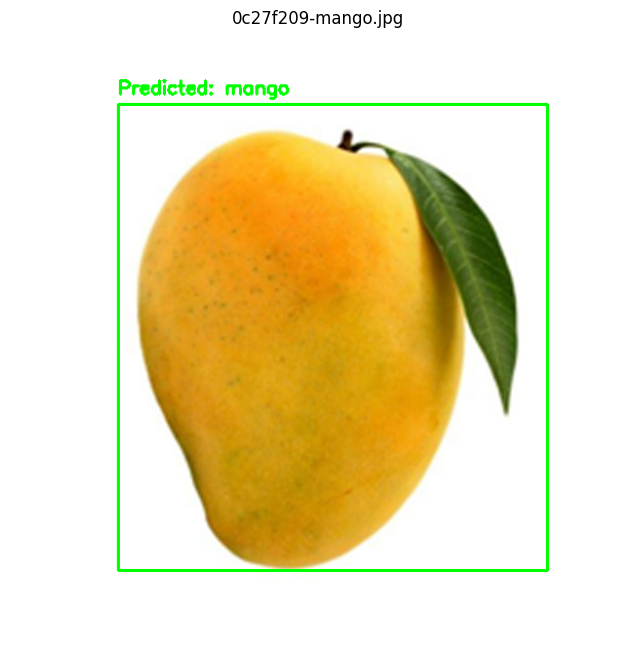

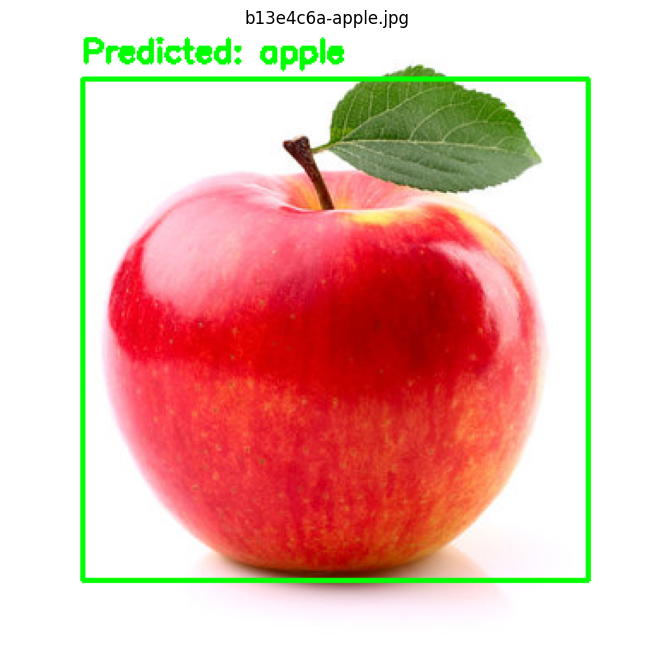

In [11]:
import cv2
import matplotlib.pyplot as plt
import yaml
import glob
import os

def load_class_names(yaml_path):
    with open(yaml_path, "r") as file:
        return yaml.safe_load(file)["names"]

def load_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def draw_bounding_boxes(image, label_path, class_names):
    h, w, _ = image.shape
    if not os.path.exists(label_path):
        return image

    with open(label_path, "r") as file:
        for line in file:
            cls_id, x, y, bw, bh = map(float, line.strip().split())

            # Shrink bounding box a little bit (e.g., 90%)
            shrink_factor = 0.9
            bw *= shrink_factor
            bh *= shrink_factor

            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)

            label_text = f"Predicted: {class_names[int(cls_id)]}"

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, label_text, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    return image

def display_image(image, title="Image"):
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

def main():
    class_names = load_class_names("/content/project/data.yaml")
    image_paths = sorted(glob.glob("/content/project/train/images/*.jpg"))

    for img_path in image_paths:
        label_path = img_path.replace("images", "labels").replace(".jpg", ".txt")
        image = load_image(img_path)
        image = draw_bounding_boxes(image, label_path, class_names)
        display_image(image, title=os.path.basename(img_path))

if __name__ == "__main__":
    main()
